In [1]:
# Download and Load the text file containing multiple json object into a pandas dataframe Q1-p1
#keep in mind that there are multiple json objects and should be read line by line 

import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler # doctest: +NORMALIZE_WHITESPACE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [3]:
#reading the data
filename='transactions.txt'
with open(filename, 'r') as f:
    object_list = []
    for line in f.readlines():
        object_list.append(json.loads(line))

In [4]:
df = pd.DataFrame(object_list)

# Cheking the size of the data/columns/statistics/nan values/dtype()/.. Q1-p2

In [5]:
# size # samples # columns 
df.shape

(641914, 29)

In [6]:
#checking few first row of the data (break down in multiple rows ro see the complete range. checking the 
#values and types 
df.iloc[0:5,0:10].head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024


In [7]:
df.iloc[0:5,10:20].head()

,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName
0,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft
1,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber
2,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft
3,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft
4,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft


In [8]:
df.iloc[0:5,20::].head()

,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


# Feature distribution analysis 

In [9]:
#checking the distribution of the features one by one to check for any special case 
# as you see in the following part some of the features have string '' which cause the pd.isnull function 
#not detect them as missing while there are no actual values in them
# these columns can simply deleted for furthur experiments as they do not have anything in it 
# non_informative =['merchantZip','posOnPremises','recurringAuthInd','echoBuffer']
#some other features however have values but the values is like index and could not have much information like
#cardCVV,cardLast4Digits,enteredCVV however better to keep them for any possible trend

In [10]:
df['merchantZip'].value_counts()  # constant value --> not informative

    641914
Name: merchantZip, dtype: int64

In [11]:
df['echoBuffer'].value_counts() # constant value --> not informative

    641914
Name: echoBuffer, dtype: int64

In [12]:
df['posConditionCode'].value_counts()

01    514144
08    121507
99      5976
         287
Name: posConditionCode, dtype: int64

In [13]:
df['posOnPremises'].value_counts() # constant value --> not informative

    641914
Name: posOnPremises, dtype: int64

In [14]:
df['recurringAuthInd'].value_counts() # constant value --> not informative

    641914
Name: recurringAuthInd, dtype: int64

In [15]:
df['transactionType'].value_counts()

PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
                           589
Name: transactionType, dtype: int64

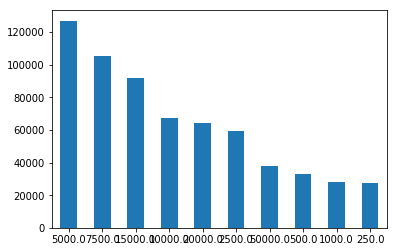

In [16]:
#checking the distribution of the credit_limits
df_credit = df['creditLimit'].value_counts()
df_credit.plot.bar(x=df_credit.index,y=df_credit.values, rot =0)
plt.show()

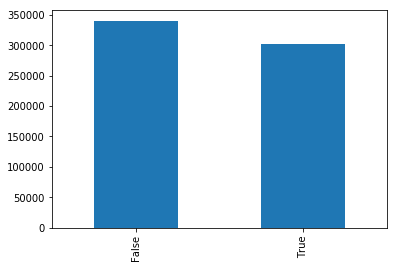

In [17]:

#checking the distribution of the cardPresent
df_cardPresent = df['cardPresent'].value_counts()
df_cardPresent.plot.bar()
plt.show()

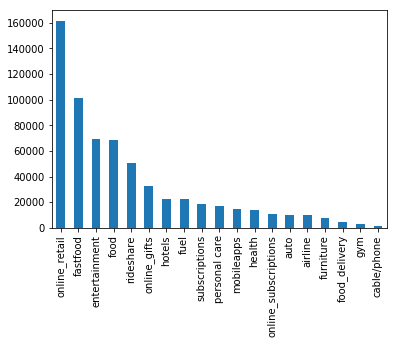

In [18]:

#checking the distribution of the merchantCategoryCode
df_merchantCategoryCode = df['merchantCategoryCode'].value_counts()
df_merchantCategoryCode.plot.bar()
plt.show()

In [19]:
#merchantCity is absent in all the rows -- not usefull feature
df['merchantCity'].value_counts()    # constant value --> not informative

    641914
Name: merchantCity, dtype: int64

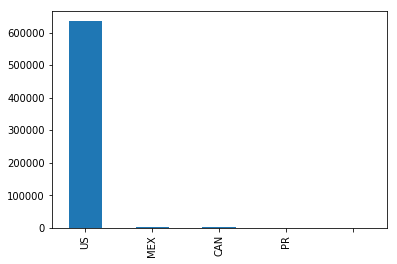

In [20]:
# plot the disctribution of merchantCountryCode
df['merchantCountryCode'].value_counts().plot.bar()

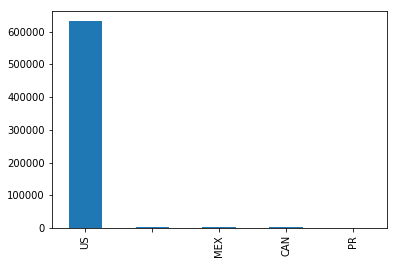

In [21]:
# plot the disctribution of acqCountry
df['acqCountry'].value_counts().plot.bar()

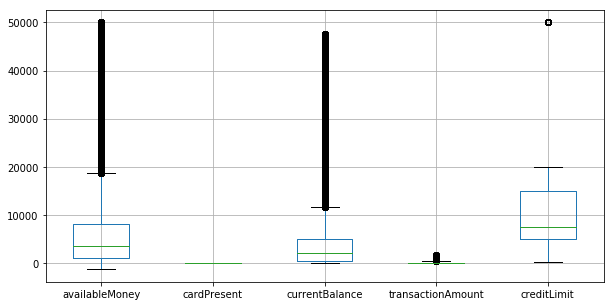

In [22]:
# feature distribution
#checking the distribution of the numerical features
fig = plt.figure(figsize = (10,5))
ax = fig.gca()
numeric_col = df[['availableMoney','cardPresent','currentBalance','transactionAmount','creditLimit']]
# pd.options.display.mpl_style = 'default'
numeric_col.boxplot(ax= ax)

In [23]:
#checking the histogram of the most informative numerical feautues 
# fig = plt.figure(figsize = (15,15))
# ax = fig.gca()
# df.hist(ax = ax)

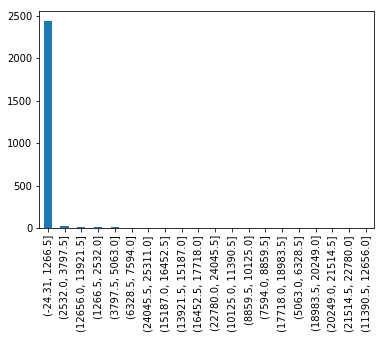

In [24]:
#list of merchants
#following bar chart shows the frquency of the merchants (popularity of a few merchant is above ..)
mer_name = df['merchantName'].value_counts()
bins = pd.cut(mer_name, 20)#,labels=['a','b','c','d','e']

bins.value_counts().plot.bar()


In [25]:
#this count function suppposed to show the not nan values in the data however as this data has ''string as values of
#missing this function and df.isnull().sum().sum() function fail to show how many nan values exists in the data 
#however with some other tricks we can check them rather than go over them one by one which we did 
#following paert provides some snippet
df.count()

accountNumber               641914
accountOpenDate             641914
acqCountry                  641914
availableMoney              641914
cardCVV                     641914
cardLast4Digits             641914
cardPresent                 641914
creditLimit                 641914
currentBalance              641914
currentExpDate              641914
customerId                  641914
dateOfLastAddressChange     641914
echoBuffer                  641914
enteredCVV                  641914
expirationDateKeyInMatch    641914
isFraud                     641914
merchantCategoryCode        641914
merchantCity                641914
merchantCountryCode         641914
merchantName                641914
merchantState               641914
merchantZip                 641914
posConditionCode            641914
posEntryMode                641914
posOnPremises               641914
recurringAuthInd            641914
transactionAmount           641914
transactionDateTime         641914
transactionType     

In [26]:
list(zip(df.columns,df.dtypes))

[('accountNumber', dtype('O')),
 ('accountOpenDate', dtype('O')),
 ('acqCountry', dtype('O')),
 ('availableMoney', dtype('float64')),
 ('cardCVV', dtype('O')),
 ('cardLast4Digits', dtype('O')),
 ('cardPresent', dtype('bool')),
 ('creditLimit', dtype('float64')),
 ('currentBalance', dtype('float64')),
 ('currentExpDate', dtype('O')),
 ('customerId', dtype('O')),
 ('dateOfLastAddressChange', dtype('O')),
 ('echoBuffer', dtype('O')),
 ('enteredCVV', dtype('O')),
 ('expirationDateKeyInMatch', dtype('bool')),
 ('isFraud', dtype('bool')),
 ('merchantCategoryCode', dtype('O')),
 ('merchantCity', dtype('O')),
 ('merchantCountryCode', dtype('O')),
 ('merchantName', dtype('O')),
 ('merchantState', dtype('O')),
 ('merchantZip', dtype('O')),
 ('posConditionCode', dtype('O')),
 ('posEntryMode', dtype('O')),
 ('posOnPremises', dtype('O')),
 ('recurringAuthInd', dtype('O')),
 ('transactionAmount', dtype('float64')),
 ('transactionDateTime', dtype('O')),
 ('transactionType', dtype('O'))]

In [27]:
df['isFraud'].value_counts()

False    630612
True      11302
Name: isFraud, dtype: int64

In [28]:
df['isFraud'].value_counts(normalize=True)

False    0.982393
True     0.017607
Name: isFraud, dtype: float64

# it shows that there is no nul value but furthur expploration shows there are some missing 

In [29]:
#list of nan values provided here
df = df.replace('', np.nan, regex=True)
for col in df.columns :
        print('NumberOfMissing in {} is'.format(col),df[col].isnull().sum().sum())

NumberOfMissing in accountNumber is 0
NumberOfMissing in accountOpenDate is 0
NumberOfMissing in acqCountry is 3913
NumberOfMissing in availableMoney is 0
NumberOfMissing in cardCVV is 0
NumberOfMissing in cardLast4Digits is 0
NumberOfMissing in cardPresent is 0
NumberOfMissing in creditLimit is 0
NumberOfMissing in currentBalance is 0
NumberOfMissing in currentExpDate is 0
NumberOfMissing in customerId is 0
NumberOfMissing in dateOfLastAddressChange is 0
NumberOfMissing in echoBuffer is 641914
NumberOfMissing in enteredCVV is 0
NumberOfMissing in expirationDateKeyInMatch is 0
NumberOfMissing in isFraud is 0
NumberOfMissing in merchantCategoryCode is 0
NumberOfMissing in merchantCity is 641914
NumberOfMissing in merchantCountryCode is 624
NumberOfMissing in merchantName is 0
NumberOfMissing in merchantState is 641914
NumberOfMissing in merchantZip is 641914
NumberOfMissing in posConditionCode is 287
NumberOfMissing in posEntryMode is 3345
NumberOfMissing in posOnPremises is 641914
Numb

In [30]:
df.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'echoBuffer', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCity', 'merchantCountryCode', 'merchantName', 'merchantState',
       'merchantZip', 'posConditionCode', 'posEntryMode', 'posOnPremises',
       'recurringAuthInd', 'transactionAmount', 'transactionDateTime',
       'transactionType'],
      dtype='object')

In [31]:
# drop constatnt feature - no information gain

df.drop(['merchantZip','posOnPremises','recurringAuthInd','echoBuffer','merchantCity', 'merchantState'], axis= 1, inplace = True)

# Feature-Class Relationships

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

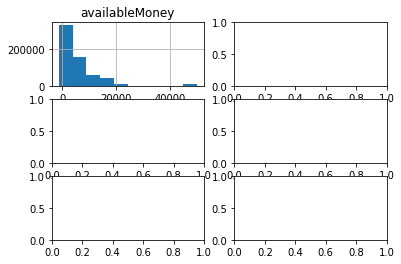

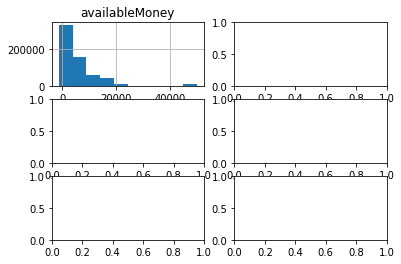

In [32]:
#The next important relationship to explore is that of each attribute to the class attribute.
#first class shows Normal activity distribution and second 6 plots shows the Fradulant class distribution
#This helps to point out differences in the distributions between the classes like those for the plas attribute.
df.groupby('isFraud').hist()

In [ ]:
np.__version__

In [ ]:
df.groupby('isFraud').plot.hist(alpha=0.4)

# Feature-Feature Relationships

In [ ]:

# from pandas.plotting import scatter_matrix
# scatter_matrix(df, alpha=0.2, figsize=(6, 6))

# Additional basic summary statistics Q1-p3 

In [ ]:
#as most of the columns have the object type describe only tells the statistics of the 4 float columns
df.describe()

In [ ]:
# Correlation Matrix Of Values is shown below which does not show high dependency of the following values and Fraud

In [33]:
df.corr()
# a heatmap could be shown here as well

,availableMoney,cardPresent,creditLimit,currentBalance,expirationDateKeyInMatch,isFraud,transactionAmount
availableMoney,1.000000,-0.017826,0.856440,0.098895,-0.001956,-0.001379,-0.011723
cardPresent,-0.017826,1.000000,-0.029424,-0.029052,0.041320,-0.014946,0.043289
creditLimit,0.856440,-0.029424,1.000000,0.598413,-0.002903,0.003357,0.002400
currentBalance,0.098895,-0.029052,0.598413,1.000000,-0.002560,0.008611,0.022820
expirationDateKeyInMatch,-0.001956,0.041320,-0.002903,-0.002560,1.000000,-0.001239,0.000347
isFraud,-0.001379,-0.014946,0.003357,0.008611,-0.001239,1.000000,0.088708
transactionAmount,-0.011723,0.043289,0.002400,0.022820,0.000347,0.088708,1.000000


In [34]:
# the data of how many costumer is analysed here
pd.unique(df['customerId']).shape

(5000,)

# Histogram of the processed amounts of each transaction Q2 -p1

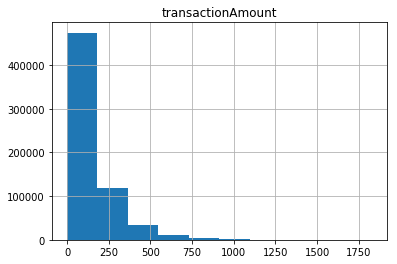

In [35]:
#histogram of transactionAmount
#following histogram shows that most of the transactions have been between less than 250$
# this shows a chi square distribution of the data with k=2 for the transaction amount
df.hist(['transactionAmount'])
plt.show()

In [36]:
df.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'enteredCVV', 'expirationDateKeyInMatch',
       'isFraud', 'merchantCategoryCode', 'merchantCountryCode',
       'merchantName', 'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionDateTime', 'transactionType'],
      dtype='object')

# Data Wrangling Q3

# extracting a df without transactionDateTime to look for duplicate in it considering that duplicate transactions only have difference in datetime

In [37]:
#extracting a df without transactionDateTime to look for duplicate in it considering that duplicate transactions only 
#have difference in datetime
df_notime = df.loc[:, df.columns != 'transactionDateTime']

In [38]:
df_notime.shape

(641914, 22)

In [39]:
# make a df of duplicates by changing the keep value we can keep the original record or not
duplicates_df = df[df_notime.duplicated(keep=False)]
print('{} number of rows with duplicate'.format(duplicates_df.shape[0]))

6790 number of rows with duplicate


In [40]:
# make a df of duplicates by changing the keep value we can keep the original record or not
# we can simply discard this transactions as they do not give extra information 
duplicates_df_no_originalrec = df[df_notime.duplicated()]
print('{} number of rows with duplicate - no original rec included'.format(duplicates_df_no_originalrec.shape[0]))

4920 number of rows with duplicate - no original rec included


In [41]:
duplicates_df_no_originalrec.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'enteredCVV', 'expirationDateKeyInMatch',
       'isFraud', 'merchantCategoryCode', 'merchantCountryCode',
       'merchantName', 'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionDateTime', 'transactionType'],
      dtype='object')

In [42]:
#sum of the repeated transations can be grouped based on the accnumber 
g = duplicates_df_no_originalrec.groupby('accountNumber')['transactionAmount'].agg('sum')

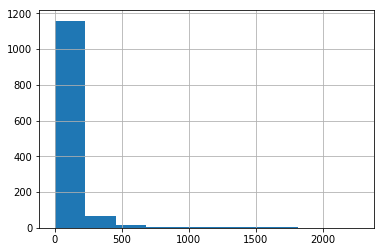

In [43]:
g.hist()

In [44]:
x = sum(g)/sum(df['transactionAmount'])
print('{:5f} percent of the overal transactions are the total tran amout of repeated transactions'.format(x))

0.001204 percent of the overal transactions are the total tran amout of repeated transactions


In [45]:
#follwing analysis shows that duplicate transactions does not have a high chance of being fradulant 

In [46]:
duplicates_df['isFraud'].value_counts(normalize=True)

False    0.999705
True     0.000295
Name: isFraud, dtype: float64

In [47]:
#number of records which duplicated 
duplicated_rec_number = duplicates_df.shape[0] - duplicates_df_no_originalrec.shape[0]
print('{} of the recoreds have been duplicated one or multiple times'.format(duplicated_rec_number))

1870 of the recoreds have been duplicated one or multiple times


In [48]:
# how many transaction types are in the file
df['transactionType'].value_counts()

PURCHASE                608685
ADDRESS_VERIFICATION     16478
REVERSAL                 16162
Name: transactionType, dtype: int64

In [49]:
#extracting a df without transactionDateTime and transactionType to look for duplicate in it considering that duplicate transactions only 
#have difference in datetime and transactionType
# I am assuming that transaction type with be reversal in those cases 
df_notime_rev = df.loc[:, df.columns[~df.columns.isin(['transactionDateTime','transactionType'])]]

In [50]:
revers_df = df[df_notime_rev.duplicated()]
# print(revers_df)

In [51]:
revers_df.shape

(5122, 23)

In [52]:
a = set(revers_df)-set(duplicates_df_no_originalrec)

#  Modeling Q4

In [53]:
df['isFraud'].value_counts()

False    630612
True      11302
Name: isFraud, dtype: int64

In [54]:
df['isFraud'].value_counts(normalize=True)

False    0.982393
True     0.017607
Name: isFraud, dtype: float64

# Feature engineering , adding some features 

In [55]:
df['year_open'] = pd.DatetimeIndex(df['accountOpenDate']).year
df['month_open'] = pd.DatetimeIndex(df['accountOpenDate']).month
df['day_open'] = pd.DatetimeIndex(df['accountOpenDate']).day

df['year_change_ad'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).year
df['month_change_ad'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).month
df['day_change_ad'] = pd.DatetimeIndex(df['dateOfLastAddressChange']).day

df['year_tran'] = pd.DatetimeIndex(df['transactionDateTime']).year
df['month_tran'] = pd.DatetimeIndex(df['transactionDateTime']).month
df['day_tran'] = pd.DatetimeIndex(df['transactionDateTime']).day
df['dayofweek_tran'] = pd.DatetimeIndex(df['transactionDateTime']).dayofweek
df['hour_tran'] = pd.DatetimeIndex(df['transactionDateTime']).hour
df['ismonthstart_tran'] = pd.DatetimeIndex(df['transactionDateTime']).is_month_start.astype('int')
df['ismonthend_tran'] = pd.DatetimeIndex(df['transactionDateTime']).is_month_end.astype('int')


# Encoding some non numerical feature for furthur processing

In [56]:
#I purposefully go one by one - it can be done by a get_dummies though
le = preprocessing.LabelEncoder()
df['merchantCategoryCode'] = le.fit_transform(df['merchantCategoryCode']) 
df['merchantCountryCode'] = df['merchantCountryCode'].factorize()[0]
df['merchantCountryCode'] = le.fit_transform(df['merchantCountryCode'])
df['merchantName'] = le.fit_transform(df['merchantName']) 
df['transactionType'] = df['transactionType'].factorize()[0]
df['transactionType'] = le.fit_transform(df['transactionType']) 
df['acqCountry'] = df['acqCountry'].factorize()[0]
df['acqCountry'] = le.fit_transform(df['acqCountry']) 
df['merchantCountryCode'] = le.fit_transform(df['merchantCountryCode']) 
df['currentExpDate'] = le.fit_transform(df['currentExpDate']) 
df['cardPresent'] = df['cardPresent'].astype('int64')
df['expirationDateKeyInMatch'] = df['expirationDateKeyInMatch'].astype('int64')
# df['isFraud'] = df['isFraud'].astype('bool')
df['enteredCVV'] = df['enteredCVV'].astype('int64')
df['posConditionCode'] = df['posConditionCode'].factorize()[0]
df['posConditionCode'] = df['posConditionCode'].astype('int64')
df['posEntryMode'] = df['posEntryMode'].factorize()[0]
df['posEntryMode'] = df['posEntryMode'].astype('int64')
df = df.fillna(0)

In [57]:
# df = pd.get_dummies(df, drop_first=True)
# df = df.fillna(0)

In [58]:
#delete constant columns
df2 = df.loc[:, (df != df.iloc[0]).any()] 

In [59]:
# was any constatnt column?
print(set(df.columns) - set(df2.columns))
df = df2

{'year_tran'}


In [60]:
df['isFraud'].count()

641914

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import pandas as pd
import numpy as np
import json 
import matplotlib.pyplot as plt

# FEATURE ENGINEERING 
# removing uninformative features if still any , extracting X and y

In [62]:

X = df.loc[:, ~df.columns.isin (['accountNumber','cardCVV','cardLast4Digits','customerId','isFraud','accountOpenDate','dateOfLastAddressChange','transactionDateTime'])]
y = df['isFraud']
X.reset_index()
y.reset_index()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

y_train = pd.DataFrame(y_train)
X_train = pd.DataFrame(X_train)


# extracting abnormal samples and combine them with 2-3 times normal sample for training purpose

In [63]:
# I try to undersampling by making a subset of all the positive(abnormals) + 3 times notmal

In [64]:
a = y_train[y_train['isFraud']==True].index

In [65]:
X_train_subP= X_train[X_train.index.isin(a)]

In [66]:
X_train_subP.shape

(7541, 27)

In [67]:
b = y_train[y_train['isFraud']==False].index

In [68]:
X_train_subN= X_train[X_train.index.isin(b)]

In [69]:
X_train_subN.shape

(422541, 27)

In [70]:
xtrainN = X_train_subN.iloc[0:7541,:]

In [71]:
ytrainP = np.ones([X_train_subP.shape[0],1])
ytrainN = np.zeros([xtrainN.shape[0],1])
ytrainP=pd.DataFrame(ytrainP)
ytrainN=pd.DataFrame(ytrainN)

In [72]:
ytrainN.shape

(7541, 1)

In [76]:
XX = X_train_subP.append(xtrainN)
yy = ytrainP.append(ytrainN)

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.33, random_state=42)

In [77]:
XX.shape

(15082, 27)

In [78]:
yy.shape

(15082, 1)

# NORMALIZING THE DATA
#use the same mean,varience that used for the scaling of the training on the test set
depends on the method I want to use (subset of training or whole I pick one of the bewlo)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [80]:
# scaler = StandardScaler()
# XX_train = scaler.fit_transform(XX)
# X_test = scaler.fit_transform(X_test)

# apply a basic model for the benchmark analysis

In [81]:
# as data is imbalanced the confusion matrix should be used as metric
# precision , recall, F-score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)
clf.predict(X_train)


y_train_pred = clf.predict_proba(X_train) 
y_train_pred = np.argmax(y_train_pred,axis=1)
# # clf.score(X_test, y_test)
print(classification_report(y_train, y_train_pred))


y_pred = clf.predict_proba(X_test) 
y_pred = np.argmax(y_pred,axis=1)
# clf.score(X_test, y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    422541
        True       0.22      0.00      0.00      7541

   micro avg       0.98      0.98      0.98    430082
   macro avg       0.60      0.50      0.50    430082
weighted avg       0.97      0.98      0.97    430082

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    208071
        True       0.00      0.00      0.00      3761

   micro avg       0.98      0.98      0.98    211832
   macro avg       0.49      0.50      0.50    211832
weighted avg       0.96      0.98      0.97    211832



In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf.fit(X_train, y_train)
print(clf.feature_importances_)

y_pred_train = clf.predict(X_train) 
print(classification_report(y_train, y_pred_train))


y_pred = clf.predict(X_test) 
print(classification_report(y_test, y_pred))


[0.00411004 0.00468894 0.02147564 0.00249614 0.0271097  0.002187
 0.02498443 0.         0.05758179 0.09485659 0.07806873 0.06896997
 0.22189962 0.34406764 0.00467115 0.         0.00373475 0.00187153
 0.01930331 0.00597195 0.00449178 0.0033106  0.00317219 0.
 0.00097652 0.         0.        ]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99    422541
        True       0.00      0.00      0.00      7541

   micro avg       0.98      0.98      0.98    430082
   macro avg       0.49      0.50      0.50    430082
weighted avg       0.97      0.98      0.97    430082

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    208071
        True       0.00      0.00      0.00      3761

   micro avg       0.98      0.98      0.98    211832
   macro avg       0.49      0.50      0.50    211832
weighted avg       0.96      0.98      0.97    211832

              precision    recall  f1-score   support

# PCA has been applied but the variance explained by the vectors where equaliy distributed and we needed to keep almost 
#all the features (only 2-3 has really low explained varience) So PCA and feature selection can not contribute a lot 

In [85]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(X_train)                 


print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[8.11318228e-02 7.69455808e-02 7.18034247e-02 6.55727981e-02
 5.82293901e-02 5.58154840e-02 5.37811056e-02 3.98106380e-02
 3.77894842e-02 3.74295044e-02 3.71095431e-02 3.70708285e-02
 3.70306402e-02 3.70100152e-02 3.68734841e-02 3.67704741e-02
 3.51792184e-02 3.48047585e-02 3.12139020e-02 2.16808038e-02
 2.13393236e-02 1.77285078e-02 1.58904803e-02 9.93833586e-03
 9.77092812e-03 2.27952354e-03 9.18666379e-29]
[9.70628708e+02 9.45255812e+02 9.13124709e+02 8.72608368e+02
 8.22296868e+02 8.05072260e+02 7.90264327e+02 6.79918854e+02
 6.62434583e+02 6.59271883e+02 6.56447985e+02 6.56105475e+02
 6.55749738e+02 6.55567095e+02 6.54356775e+02 6.53442128e+02
 6.39146784e+02 6.35736034e+02 6.02048595e+02 5.01759039e+02
 4.97791917e+02 4.53725938e+02 4.29562170e+02 3.39714708e+02
 3.36841370e+02 1.62697004e+02 3.26615226e-11]


# apply anomaly detection algorithms on a down sample subset of the train data
I made a subset which has all the abnormal samples plus 2/3 times normal samples in XX_train

In [91]:
#training the one class svm on a random set of samples 
from sklearn import svm
# fit the model
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
clf.fit(X_train[0:10000])
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [93]:
y_pred_test[y_pred_test==-1]=1
y_pred_test[y_pred_test==1]=0

y_pred_train[y_pred_train==-1]=1
y_pred_train[y_pred_train==1]=0

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    422541
        True       0.00      0.00      0.00      7541

   micro avg       0.98      0.98      0.98    430082
   macro avg       0.49      0.50      0.50    430082
weighted avg       0.97      0.98      0.97    430082

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    208071
        True       0.00      0.00      0.00      3761

   micro avg       0.98      0.98      0.98    211832
   macro avg       0.49      0.50      0.50    211832
weighted avg       0.96      0.98      0.97    211832



In [82]:
#training the ocsvm on the down samples subset 
from sklearn import svm
# fit the model
clf = svm.OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
clf.fit(XX_train)
y_pred_train = clf.predict(XX_train)


In [83]:
y_pred_test = clf.predict(X_test)
y_pred_test[y_pred_test==-1]=1
y_pred_test[y_pred_test==1]=0

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    208071
        True       0.00      0.00      0.00      3761

   micro avg       0.98      0.98      0.98    211832
   macro avg       0.49      0.50      0.50    211832
weighted avg       0.96      0.98      0.97    211832



In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)
clf = IsolationForest(max_samples=100,random_state=rng)
clf.fit(XX_train)


IsolationForest(behaviour='old', bootstrap=False, contamination='legacy',
        max_features=1.0, max_samples=100, n_estimators=100, n_jobs=None,
        random_state=<mtrand.RandomState object at 0x7ff11b2c7e10>,
        verbose=0)

In [85]:
#please ignore micro/macro averaging
y_pred_test = clf.predict(X_test)
y_pred_test[y_pred_test==-1]=1
y_pred_test[y_pred_test==1]=0

print(classification_report(y_test, y_pred_test)) 

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    208071
        True       0.00      0.00      0.00      3761

   micro avg       0.98      0.98      0.98    211832
   macro avg       0.49      0.50      0.50    211832
weighted avg       0.96      0.98      0.97    211832



In [86]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_test)
np.set_printoptions(precision=2)
class_names ={'True','False'}
# Plot non-normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names,
#                       title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
# plt.figure()
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                       title='Normalized confusion matrix')

# plt.show()

In [87]:
cnf_matrix

array([[208071,      0],
       [  3761,      0]])

# Extracting the important samples (under sampling)

In [95]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [98]:
clf = RandomForestClassifier(n_estimators=50, max_depth=10,random_state=0)
clf.fit(X_res, y_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
y_pred = clf.predict(X_test)
print(f1_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred, average=None) )
print('recall',recall_score(y_test, y_pred, average=None) )
print(classification_report(y_test, y_pred))
print('roc_auc_score',roc_auc_score(y_test, y_pred))

0.07419812276318455
precision [0.99 0.04]
recall [0.68 0.73]
              precision    recall  f1-score   support

       False       0.99      0.68      0.80    208071
        True       0.04      0.73      0.07      3761

   micro avg       0.68      0.68      0.68    211832
   macro avg       0.52      0.70      0.44    211832
weighted avg       0.98      0.68      0.79    211832

roc_auc_score 0.7029022672017043


In [101]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=5)
model.fit(X_res, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [102]:
y_pred = model.predict(np.asarray(X_test))
predictions = [round(value) for value in y_pred]
print(f1_score(y_test, y_pred))
print('precision',precision_score(y_test, y_pred, average=None) )
print('recall',recall_score(y_test, y_pred, average=None) )
print(classification_report(y_test, y_pred))
print('roc_auc_score',roc_auc_score(y_test, y_pred))

0.07815502882767456
precision [0.99 0.04]
recall [0.7  0.71]
              precision    recall  f1-score   support

       False       0.99      0.70      0.82    208071
        True       0.04      0.71      0.08      3761

   micro avg       0.70      0.70      0.70    211832
   macro avg       0.52      0.71      0.45    211832
weighted avg       0.98      0.70      0.81    211832

roc_auc_score 0.707258066302049


In [ ]:
# I implplimented some PCA analysis and feature selection techniques and repeated the classification
# to see if the feature importance helps or not and of course as we did not have much of features and all almost same 
# weight in the PCA analysis, we could not help the accuracy with this way.


In [ ]:
# I was planning to use the imblearn library for undersampling or oversampoling of the data with the techniques such
# as CondensedNearestNeighbour,EditedNearestNeighbours and others listed in that library but the time was so limited.
# I was also implimenting a code inorder to use. I did not include those analysis as they did not contribute to 
# the performannce of the algorithm.


In [ ]:
# I would alos fine tuned my parameters of ocsvm and isolation forest with grid search if I had enough time with grid search

In [ ]:
#providing a confusion matrix was one of my objectives which I could not satisfy due to the limited timing

In [ ]:
# I could not analys my pair plots and many other parts of the expplaroty part
￼
